# IS 4487 Lab 3

## Outline

Repeat exercises from Lab 2, but with the *SuperStore Retail Orders* dataset
- Loading installed packages
- Inspect data
- Explore plot types

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab3_retailer_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [86]:
df = pd.read_csv (r'/content/drive/MyDrive/Colab Notebooks/superstore_retail_orders.csv')

df.describe()

,customer_id,postal_code,order_id,customer_id.1,order_id.1,product_id,quantity,product_id.1
count,9569.000000,9416.000000,9569.000000,9569.000000,9569.000000,9569.000000,9513.000000,9569.000000
mean,282.910962,52225.007116,5107.539450,282.910962,5107.539450,106.736650,3.453380,106.736650
std,199.763947,29619.544418,2043.449403,199.763947,2043.449403,3.694805,4.393894,3.694805
min,1.000000,1105.000000,1001.000000,1.000000,1001.000000,101.000000,1.000000,101.000000
25%,127.000000,27409.000000,3393.000000,127.000000,3393.000000,104.000000,1.000000,104.000000
50%,253.000000,48295.000000,5577.000000,253.000000,5577.000000,107.000000,1.000000,107.000000
75%,376.000000,79923.000000,6829.000000,376.000000,6829.000000,110.000000,4.000000,110.000000
max,800.000000,99812.000000,8147.000000,800.000000,8147.000000,114.000000,20.000000,114.000000


## Prepare Data

➡️ Assignment Tasks
- Convert the Total_Amount into a number (not a string)
- Remove rows with empty (NULL) values
- Optional: Locate outliers in any of the variables.   Filter them out if they are mistakes; keep them if they are exceptional cases.

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9569 entries, 0 to 9568
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       9569 non-null   int64  
 1   customer_name     9569 non-null   object 
 2   address_line_1    9448 non-null   object 
 3   city              9516 non-null   object 
 4   state_province    9569 non-null   object 
 5   postal_code       9416 non-null   float64
 6   order_id          9569 non-null   int64  
 7   order_date        9312 non-null   object 
 8   customer_id.1     9569 non-null   int64  
 9   order_id.1        9569 non-null   int64  
 10  product_id        9569 non-null   int64  
 11  quantity          9513 non-null   float64
 12  product_id.1      9569 non-null   int64  
 13  product_name      9569 non-null   object 
 14  product_price     9569 non-null   object 
 15  total_amount      9513 non-null   object 
 16  order_year_month  9312 non-null   object 


In [88]:
df['total_amount'] = df['total_amount'].str.replace('$', '').str.replace(',', '').astype(float)
df['product_price'] = df['product_price'].str.replace('$', '').str.replace(',', '').astype(float)

df = df.dropna()
df.describe()


<ipython-input-88-bddcdf975656>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['total_amount'] = df['total_amount'].str.replace('$', '').str.replace(',', '').astype(float)
<ipython-input-88-bddcdf975656>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['product_price'] = df['product_price'].str.replace('$', '').str.replace(',', '').astype(float)


,customer_id,postal_code,order_id,customer_id.1,order_id.1,product_id,quantity,product_id.1,product_price,total_amount
count,8981.000000,8981.000000,8981.000000,8981.000000,8981.000000,8981.000000,8981.000000,8981.000000,8981.000000,8981.000000
mean,268.464982,52230.965371,4974.766173,268.464982,4974.766173,106.688231,3.344394,106.688231,290.239500,344.002359
std,189.860282,29663.530626,2034.447409,189.860282,2034.447409,3.657543,4.244108,3.657543,340.809583,375.985611
min,1.000000,1105.000000,1001.000000,1.000000,1001.000000,101.000000,1.000000,101.000000,1.990000,1.990000
25%,121.000000,27404.000000,3246.000000,121.000000,3246.000000,104.000000,1.000000,104.000000,4.990000,55.990000
50%,243.000000,48295.000000,5430.000000,243.000000,5430.000000,107.000000,1.000000,107.000000,59.990000,167.970000
75%,362.000000,79923.000000,6675.000000,362.000000,6675.000000,110.000000,4.000000,110.000000,694.970000,694.970000
max,800.000000,99812.000000,8147.000000,800.000000,8147.000000,114.000000,20.000000,114.000000,988.720000,1977.440000


In [89]:
df['order_month'] = df['order_month'].str.replace(' ', '')

<ipython-input-89-b566315ccab7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order_month'] = df['order_month'].str.replace(' ', '')


In [90]:
import pandas as pd

df['order_month'] = pd.to_datetime(df['order_month'], format='%B').dt.month

df = df.sort_values(by='order_month')


<ipython-input-90-6ecdcbacdae4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order_month'] = pd.to_datetime(df['order_month'], format='%B').dt.month


## Summarize Data

➡️ Assignment Tasks
- Display the average price per month
- Display the total revenue for all months

<Axes: xlabel='order_month'>

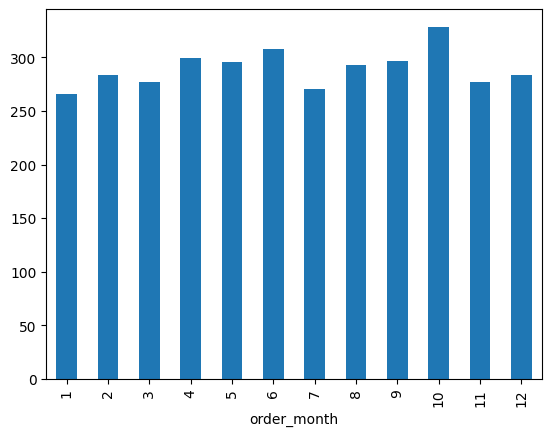

In [91]:
month = df.groupby('order_month')['product_price'].mean()
month.plot.bar()

In [92]:
df['total_amount'].sum()

3089485.1899999995